In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

rand və randn arasındakı fərq -> rand uniform sütun tipli data yaradır, randn normal distribution tipli bir şey yaradır

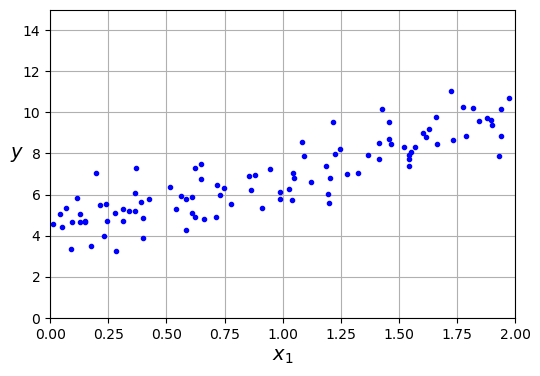

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid();

In [5]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

result = matrix_a @ matrix_b #dot-product 
result1 = np.dot(matrix_a, matrix_b) #dot-pro
# matrix_a * matrix_b --> element-wise
print('Matrix A:')
print(matrix_a)
print('\nMatrix B:')
print(matrix_b)
print('\nResult of Matrix multiplication (A @ B):')
print(result1)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Result of Matrix multiplication (A @ B):
[[19 22]
 [43 50]]


In [6]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # wx + b de b olsun deye
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # X transpose times X and then inverse it and dot product X transpose and y

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

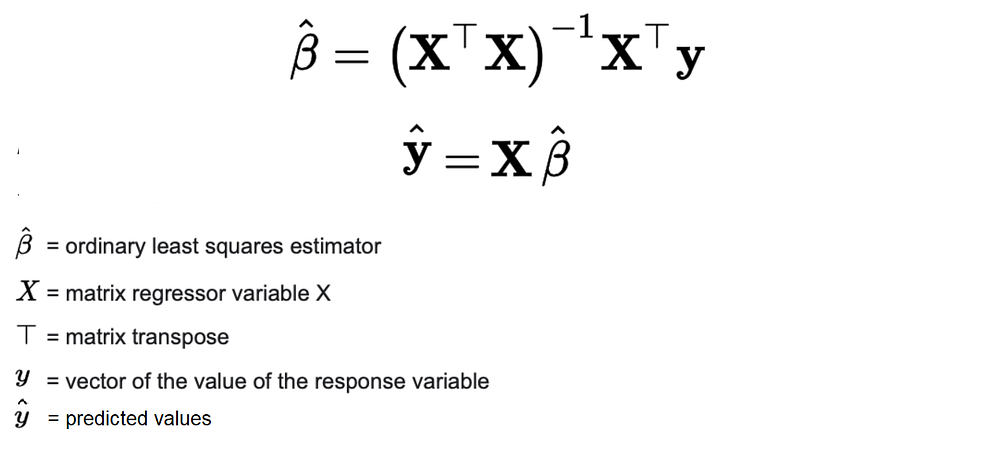

In [8]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

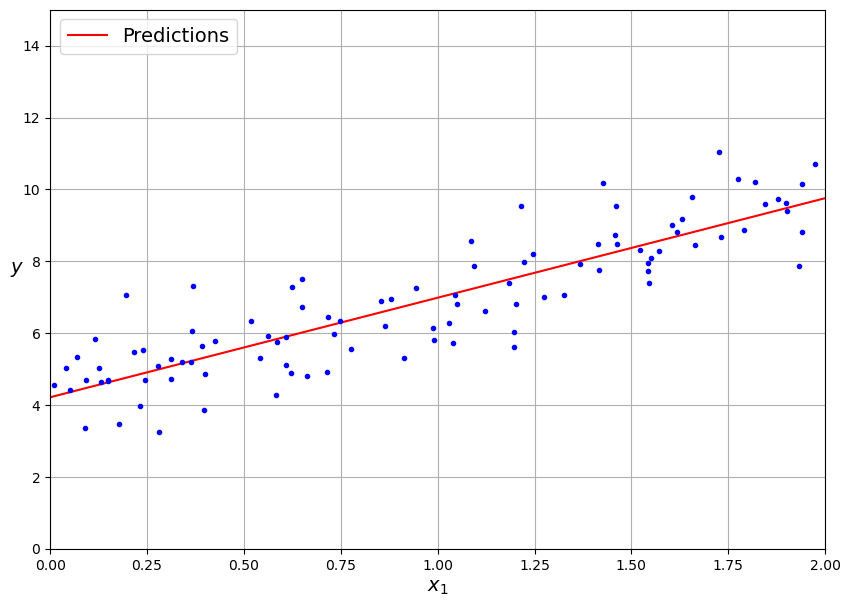

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_    #interceot b-dir, coefficient w-di

(array([4.21509616]), array([[2.77011339]]))

In [11]:
def linreg(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

print(linreg(X_b, y))

[[4.21509616]
 [2.77011339]]


# Gradient Descent

In [12]:
# Batch (or Full) Gradient Descent - take all data, calculate its lost function

In [15]:
X_b[0]

array([1.        , 0.74908024])

In [16]:
eta = 0.1 #learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradient = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradient

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

In [21]:
#stochastic (random) gradient descent

In [22]:
np.random.seed(42)
eta = 0.1
m = len(X_b)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1] # : ishareden sonra matrix edir
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients

In [23]:
theta

array([[4.17686315],
       [2.85986577]])

In [25]:
#scikit-learn bunu aşağıda eynisi ilə belə yazır

In [26]:
from sklearn.linear_model import SGDRegressor

In [28]:
sgd_reg = SGDRegressor(max_iter=1000, tol= 1e-5, penalty=None, eta0 = 0.01, n_iter_no_change=100, random_state=42) # tol - tolerance
sgd_reg.fit(X, y.ravel()) # ravel reduces dimension to 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [29]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [30]:
# Mini Batch Gradient Descend

In [32]:
np.random.permutation(m)

array([96, 70, 28, 72, 87, 91,  6, 42, 40, 94, 37, 67, 52, 33, 34, 57, 63,
       64, 82, 11, 12,  2, 25, 93,  5, 35, 48, 54, 62, 19, 53, 43, 80, 61,
       45, 75, 46,  8, 66, 92, 18, 20, 77,  0,  7, 10, 27, 50, 58, 23, 74,
       30, 76, 15,  9, 24, 79, 26, 95, 85, 32, 41, 71, 88, 16,  3, 55, 90,
       89, 81,  4, 60, 56, 65, 31, 68, 73, 83, 86, 14, 49, 17, 13,  1, 51,
       21, 36, 44, 84, 47, 99, 38, 29, 98, 22, 97, 78, 69, 59, 39])

In [33]:
from math import ceil

In [34]:
n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20 #1 destede 20 dene
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx  + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients

In [35]:
theta

array([[4.22023943],
       [2.7704472 ]])

# Polynomial Regression

In [36]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

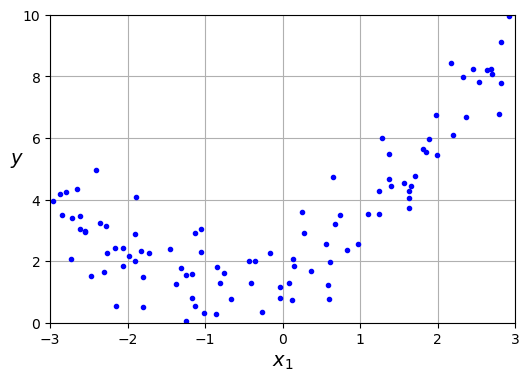

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [39]:
lin_reg.fit(X, y)

predictions = lin_reg.predict([[-3], [3]])
predictions

array([[1.03315352],
       [6.09487734]])

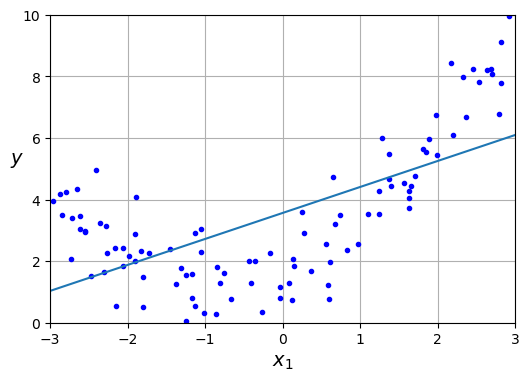

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.plot([-3,3], predictions)
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [45]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [47]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [49]:
model = lin_reg.fit(X_poly, y)
poly_predict = model.predict

In [50]:
X.shape

(100, 1)

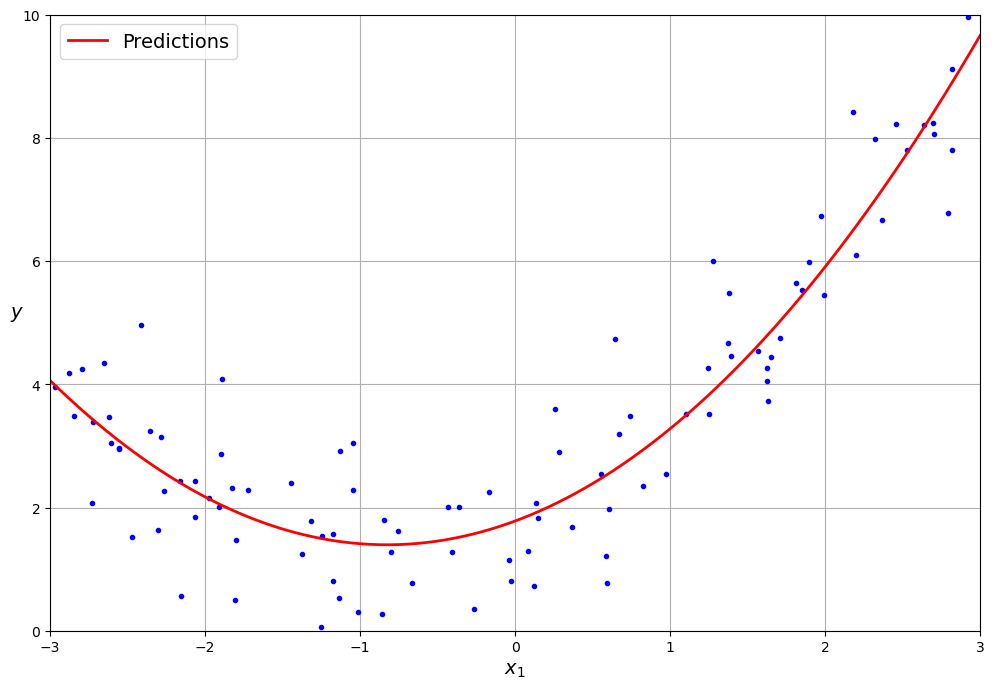

In [53]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(12, 8))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

# mentor hours

In [148]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [149]:
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 2 * X

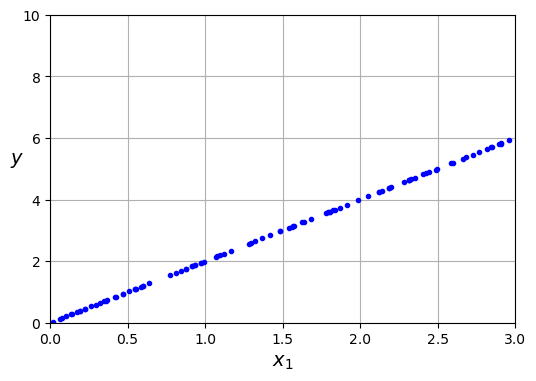

In [150]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 3, 0, 10])
plt.grid();

In [151]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

result = matrix_a @ matrix_b #dot-product 
result1 = np.dot(matrix_a, matrix_b) #dot-product
# npmatmul()
# matrix_a * matrix_b --> element-wise
print('Matrix A:')
print(matrix_a)
print('\nMatrix B:')
print(matrix_b)
print('\nResult of Matrix multiplication (A @ B):')
print(result1)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Result of Matrix multiplication (A @ B):
[[19 22]
 [43 50]]


In [152]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [153]:
theta_best

array([[1.1379786e-15],
       [2.0000000e+00]])

In [154]:
X_new = np.array([[0], [3]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[1.1379786e-15],
       [6.0000000e+00]])

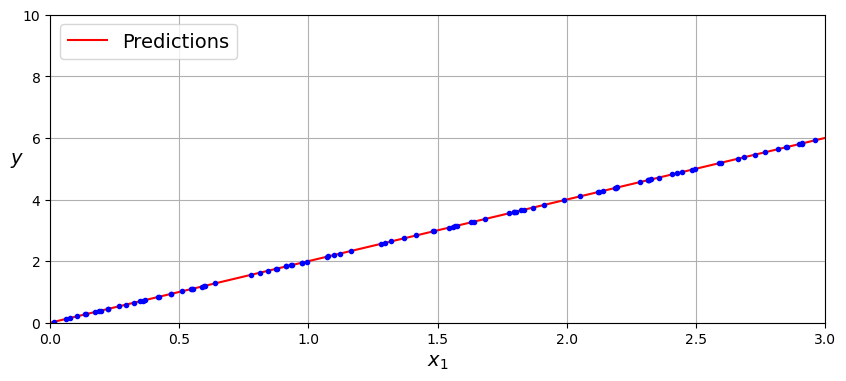

In [155]:
plt.figure(figsize=(10, 4))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 3, 0, 10])
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [156]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.]), array([[2.]]))

In [157]:
# Gradient Descend
X_b[0]

array([1.        , 1.12362036])

In [158]:
eta = 0.1 #learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradient = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradient

In [159]:
theta

array([[9.97959606e-18],
       [2.00000000e+00]])

In [160]:
np.random.seed(42)
eta = 0.1
m = len(X_b)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1] # : ishareden sonra matrix edir
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients

In [161]:
theta

array([[3.29474745e-18],
       [2.00000000e+00]])

In [162]:
sgd_reg = SGDRegressor(max_iter=1000, tol= 1e-5, penalty=None, eta0 = 0.01, n_iter_no_change=100, random_state=42) # tol - tolerance
sgd_reg.fit(X, y.ravel()) # ravel reduces dimension to 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [163]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.00534812]), array([1.99705818]))

In [164]:
np.random.permutation(m)

array([96, 70, 28, 72, 87, 91,  6, 42, 40, 94, 37, 67, 52, 33, 34, 57, 63,
       64, 82, 11, 12,  2, 25, 93,  5, 35, 48, 54, 62, 19, 53, 43, 80, 61,
       45, 75, 46,  8, 66, 92, 18, 20, 77,  0,  7, 10, 27, 50, 58, 23, 74,
       30, 76, 15,  9, 24, 79, 26, 95, 85, 32, 41, 71, 88, 16,  3, 55, 90,
       89, 81,  4, 60, 56, 65, 31, 68, 73, 83, 86, 14, 49, 17, 13,  1, 51,
       21, 36, 44, 84, 47, 99, 38, 29, 98, 22, 97, 78, 69, 59, 39])

In [165]:
n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20 #1 destede 20 dene
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx  + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients

In [166]:
theta

array([[1.42551444e-05],
       [1.99999266e+00]])

In [167]:
#Polynomial Regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.12362036])

In [168]:
X_poly[0]

array([1.12362036, 1.26252271])

In [169]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.4408921e-16]), array([[ 2.00000000e+00, -2.05504409e-16]]))

In [170]:
model = lin_reg.fit(X_poly, y)
poly_predict = model.predict

In [171]:
X.shape

(100, 1)

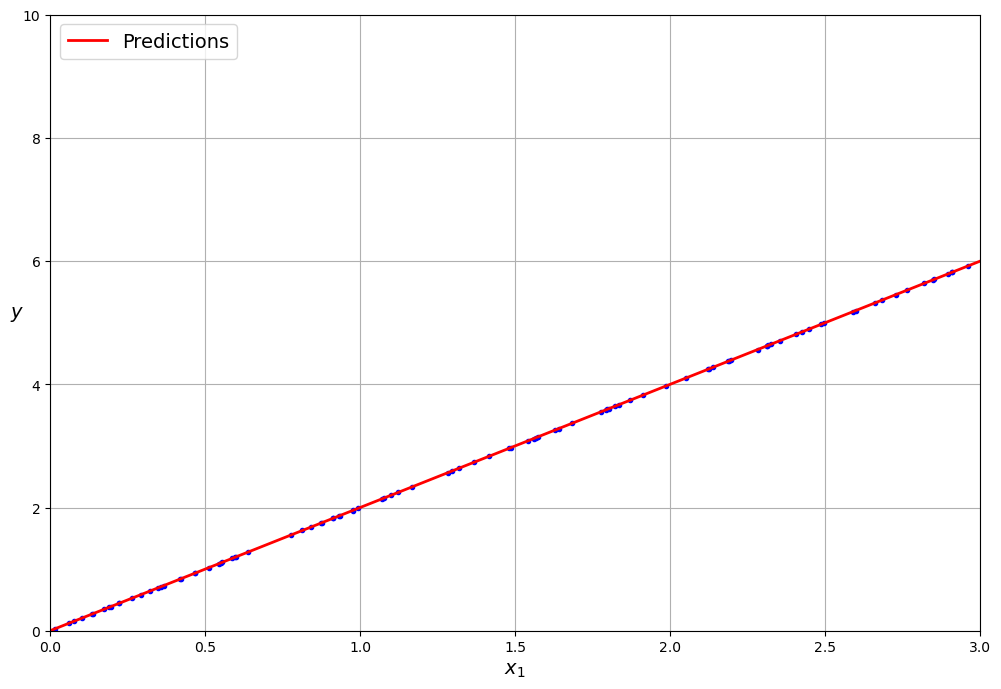

In [172]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(12, 8))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')
plt.axis([0, 3, 0, 10])
plt.grid()
plt.show()

In [173]:
df = pd.read_csv('WineQT.csv')

In [87]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [88]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [90]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [91]:
df.drop('Id', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [92]:
if df['quality'].isna().sum() > 0:
    df.dropna(subset='quality')

In [93]:
X = df.drop('quality', axis=1)
y = df['quality'].copy()

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 12), (229, 12), (914,), (229,))

In [97]:
len(X_train.columns), len(X_test.columns)

(12, 12)

In [98]:
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [101]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('object', cat_pipeline, cat_features)
], remainder='passthrough')

estimator = RandomForestClassifier()
full_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('estimator', estimator)
])

In [102]:
# transformer.fit_transform(X_train)

In [103]:
# get_col_names = transformer.get_feature_names_out()
# get_col_names

In [104]:
# X_train_transformed = pd.DataFrame(data=transformer.transform(X_train), columns=get_col_names)
# X_train_transformed

In [105]:
# X_transformed_test = pd.DataFrame(data=transformer.transform(X_test), columns=get_col_names)
# X_transformed_test

In [106]:
#from sklearn.ensemble import RandomForestRegressor

In [107]:
#rfr = RandomForestRegressor()

In [108]:
#rfr.fit(X_train_transformed, y_train)

In [109]:
#rfr.score(X_train_transformed, y_train)

In [110]:
#rfr.score(X_transformed_test, y_test)

In [111]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')),
                                                 ('object',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('estimator', RandomForestClassifier())])

In [112]:
full_pipeline.score(X_train, y_train)

1.0

In [113]:
full_pipeline.score(X_test, y_test)

0.6943231441048034

In [114]:
# Logistic Regression Part
from sklearn.linear_model import LogisticRegression

In [115]:
log_reg = LogisticRegression()

In [116]:
log_reg.fit(X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
log_reg.intercept_

array([-0.00237153, -0.00220146,  0.00533222,  0.00323746, -0.00232979,
       -0.00166691])

In [118]:
log_reg.coef_

array([[-2.09083211e-02, -5.64987181e-04, -7.78417135e-04,
        -5.45101840e-03, -1.77196853e-04, -2.45472540e-02,
        -6.99707396e-02, -2.36308666e-03, -7.71101357e-03,
        -1.78124190e-03, -2.56932724e-02,  2.37085022e-04],
       [-2.74544377e-02,  6.42012615e-04, -1.77440493e-03,
        -4.40932237e-03, -1.21474375e-04,  9.86055906e-03,
         1.24372639e-02, -2.19871324e-03, -6.34774142e-03,
        -1.72789432e-03, -2.38178312e-02, -7.02808057e-04],
       [ 2.95793379e-02,  1.00503087e-02, -3.29406206e-03,
         5.24735516e-03,  1.04473048e-03, -6.75668203e-03,
         4.62161846e-02,  5.35754504e-03,  1.69040247e-02,
        -3.46211496e-03, -1.34001952e-02,  2.75306369e-04],
       [ 3.16968992e-02, -1.40676229e-03,  7.53706443e-04,
         1.82430575e-04,  1.88061204e-04,  6.92136056e-03,
         2.72460206e-02,  3.22520928e-03,  1.18153683e-02,
         5.07422667e-03,  5.21843215e-02,  3.10373413e-04],
       [ 7.32537727e-04, -7.24082906e-03,  4.7791115

In [119]:
log_reg.score(X_train, y_train)

0.49562363238512036

In [120]:
log_reg.score(X_test, y_test)

0.5502183406113537